# Importing Libraries #

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.impute import SimpleImputer ,KNNImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier ,RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')

# Reading Data #

In [2]:
df = pd.read_csv(r'D:\Track projects\Weather_Classification\dataset\weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [3]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [7]:
df.describe(include='object')

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,142193,142193,132863,132180,138415,140787,142193
unique,3436,49,16,16,16,2,2
top,2013-12-01,Canberra,W,N,SE,No,No
freq,49,3418,9780,11393,10663,109332,110316


In [8]:
df.drop(columns=['RISK_MM'], inplace=True)

# Handle Missing Values and Duplicates #

In [9]:
df.isna().sum().sort_values(ascending=False)/len(df)*100

Sunshine         47.692924
Evaporation      42.789026
Cloud3pm         40.152469
Cloud9am         37.735332
Pressure9am       9.855619
Pressure3pm       9.832411
WindDir9am        7.041838
WindGustDir       6.561504
WindGustSpeed     6.519308
WindDir3pm        2.656952
Humidity3pm       2.538803
Temp3pm           1.917113
WindSpeed3pm      1.849599
Humidity9am       1.247600
Rainfall          0.988797
RainToday         0.988797
WindSpeed9am      0.948007
Temp9am           0.635756
MinTemp           0.447983
MaxTemp           0.226453
Date              0.000000
Location          0.000000
RainTomorrow      0.000000
dtype: float64

In [10]:
df.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am'],inplace=True)

In [11]:
num_col = df.select_dtypes(include=['int64', 'float64']).columns
cat_col = df.select_dtypes(include='object').columns

In [12]:
knn_Imputer = KNNImputer(n_neighbors=5)
df[num_col] = knn_Imputer.fit_transform(df[num_col])

In [13]:
Simple_imputer  = SimpleImputer(strategy='most_frequent')
df[cat_col] = df[cat_col].astype(str)
df[cat_col] = Simple_imputer.fit_transform(df[cat_col])

## Feature Engineering ##

In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df["month"] = df["Date"].dt.month
df.drop(columns=['Date'],inplace=True)
df['month'] = df['month'].astype('int32')

## Outlier Handle ##

In [15]:
num_col

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')

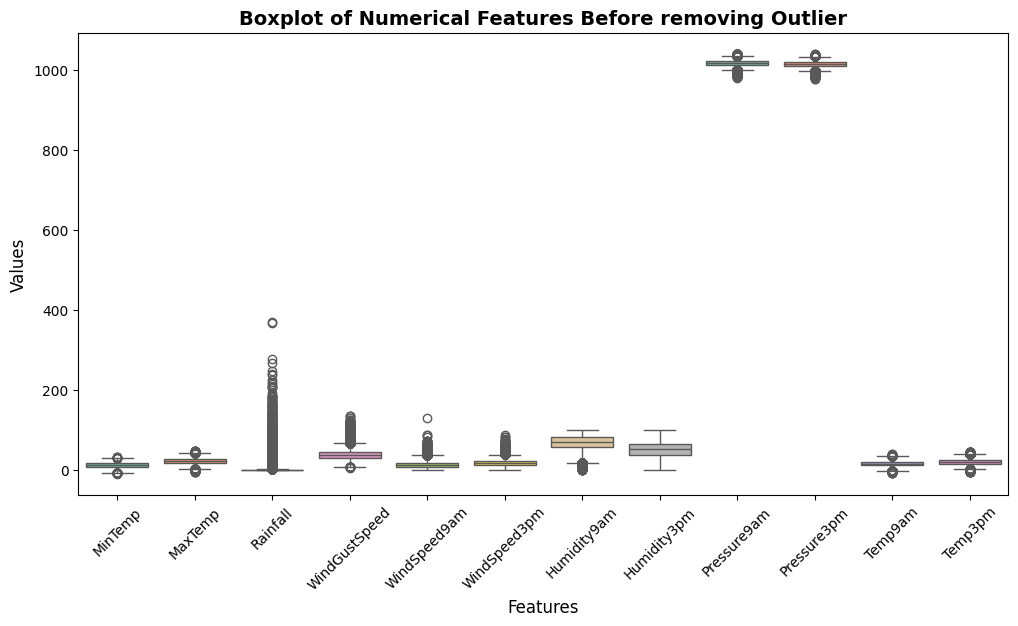

In [16]:
plt.figure(figsize=(12,6)) 
sns.boxplot(data=df[num_col] ,palette="Set2")  
plt.title("Boxplot of Numerical Features Before removing Outlier", fontsize=14, fontweight="bold")
plt.xlabel("Features", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [17]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[[column]].clip(lower=lower_bound, upper=upper_bound)
    return data

for col in num_col:
    df = remove_outliers_iqr(df, col)

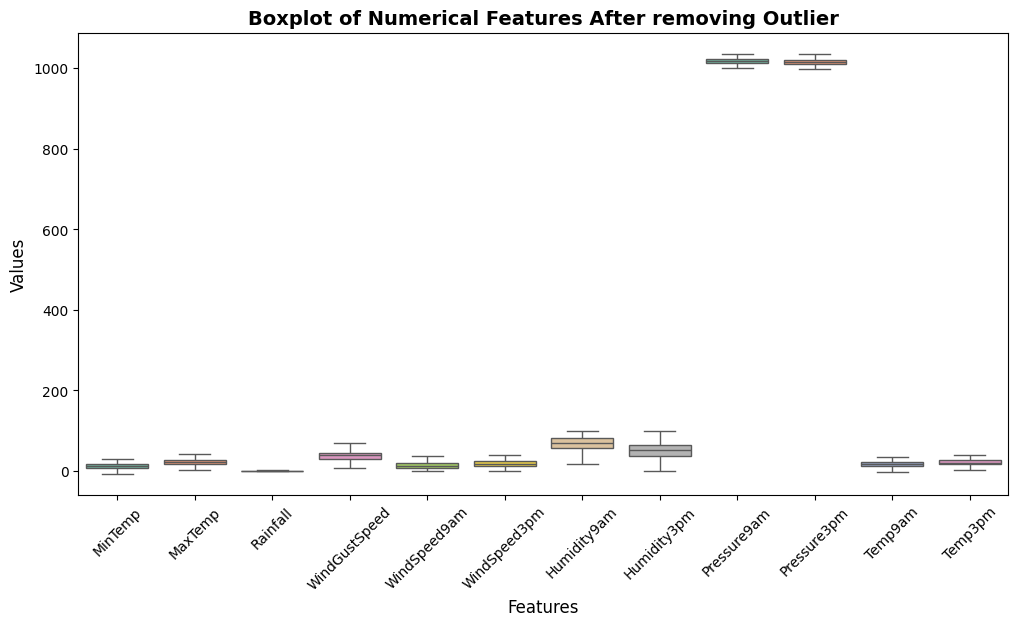

In [18]:
plt.figure(figsize=(12,6)) 
sns.boxplot(data=df[num_col] ,palette="Set2")  
plt.title("Boxplot of Numerical Features After removing Outlier", fontsize=14, fontweight="bold")
plt.xlabel("Features", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Analysis & Visualization #


In [19]:
df[num_col].corr()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.735270,0.048076,0.189041,0.178802,0.177773,-0.236605,0.001777,-0.445938,-0.460281,0.901309,0.707764
MaxTemp,0.735270,1.000000,-0.259642,0.083743,0.017039,0.054573,-0.505050,-0.507477,-0.333076,-0.426717,0.885958,0.979691
Rainfall,0.048076,-0.259642,1.000000,0.148478,0.102778,0.081905,0.391442,0.415794,-0.184004,-0.098268,-0.119145,-0.266598
WindGustSpeed,0.189041,0.083743,0.148478,1.000000,0.589480,0.672542,-0.223291,-0.034630,-0.438711,-0.395995,0.162543,0.047757
WindSpeed9am,0.178802,0.017039,0.102778,0.589480,1.000000,0.510269,-0.274766,-0.031578,-0.227158,-0.178969,0.130908,0.003870
WindSpeed3pm,0.177773,0.054573,0.081905,0.672542,0.510269,1.000000,-0.149244,0.015241,-0.291077,-0.256423,0.167190,0.030451
Humidity9am,-0.236605,-0.505050,0.391442,-0.223291,-0.274766,-0.149244,1.000000,0.664625,0.139547,0.187484,-0.473455,-0.497154
Humidity3pm,0.001777,-0.507477,0.415794,-0.034630,-0.031578,0.015241,0.664625,1.000000,-0.019612,0.060084,-0.226009,-0.558659
Pressure9am,-0.445938,-0.333076,-0.184004,-0.438711,-0.227158,-0.291077,0.139547,-0.019612,1.000000,0.960762,-0.419473,-0.292579
Pressure3pm,-0.460281,-0.426717,-0.098268,-0.395995,-0.178969,-0.256423,0.187484,0.060084,0.960762,1.000000,-0.468720,-0.394298


<Axes: >

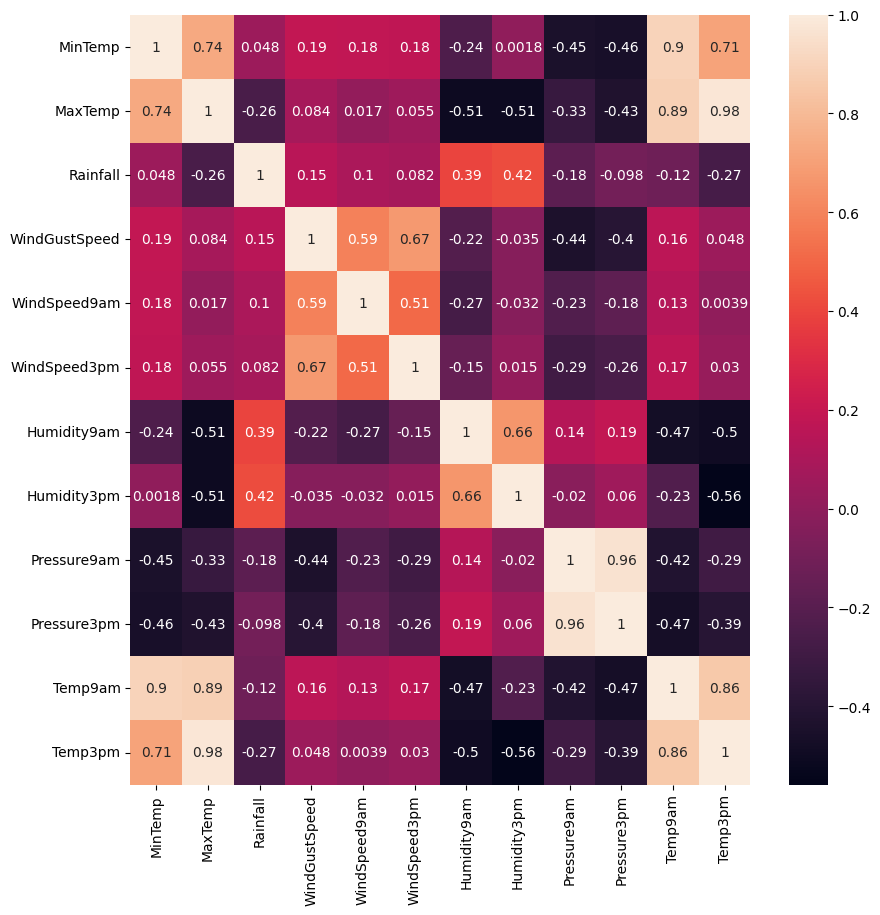

In [20]:
plt.figure(figsize=(10,10))

sns.heatmap(df[num_col].corr(), annot=True)

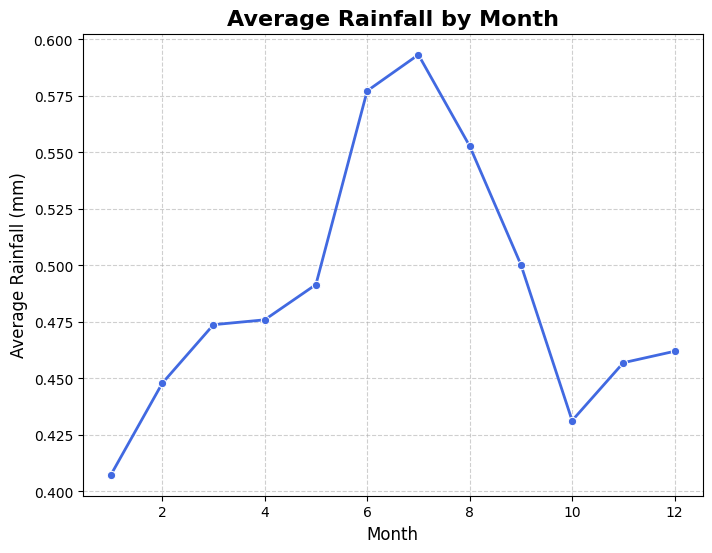

In [21]:
# Grouped data
grouped_months = df.groupby('month')['Rainfall'].mean()


plt.figure(figsize=(8,6))
sns.lineplot(x=grouped_months.index, y=grouped_months.values, marker="o", linewidth=2, color="royalblue")


plt.title("Average Rainfall by Month", fontsize=16, fontweight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Rainfall (mm)", fontsize=12)

plt.grid(True, linestyle="--", alpha=0.6)

plt.show()

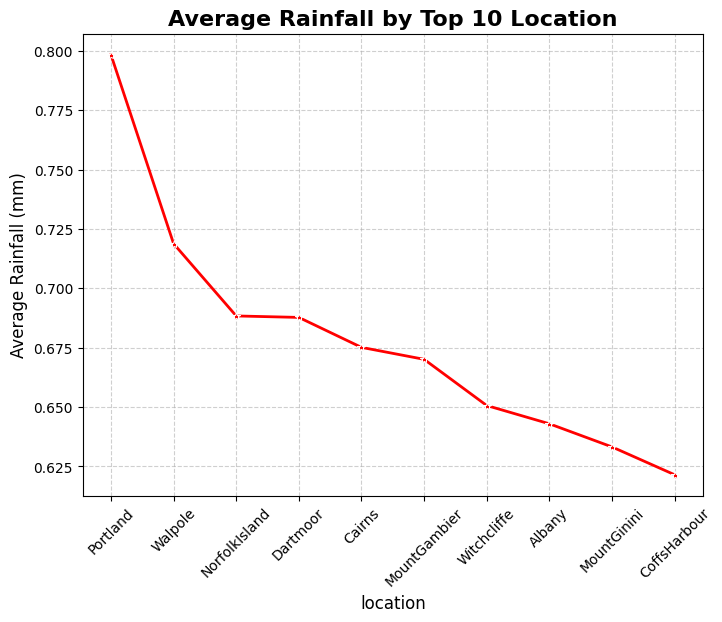

In [22]:
grouped_locations = df.groupby('Location')['Rainfall'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,6))
sns.lineplot(x=grouped_locations.index, y=grouped_locations.values, marker="*", linewidth=2, color="red")


plt.title("Average Rainfall by Top 10 Location", fontsize=16, fontweight="bold")
plt.xlabel("location", fontsize=12)
plt.ylabel("Average Rainfall (mm)", fontsize=12)

plt.grid(True, linestyle="--", alpha=0.6)
xticks = plt.xticks(rotation=45)

plt.show()

Text(0, 0.5, 'Count')

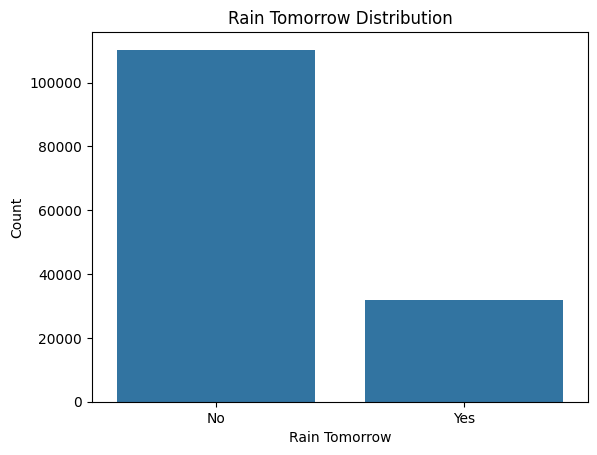

In [23]:
sns.countplot(x='RainTomorrow', data=df)
plt.title("Rain Tomorrow Distribution")
plt.xlabel("Rain Tomorrow")
plt.ylabel("Count") 

Text(0.5, 1.0, 'Humidity3pm vs Temp')

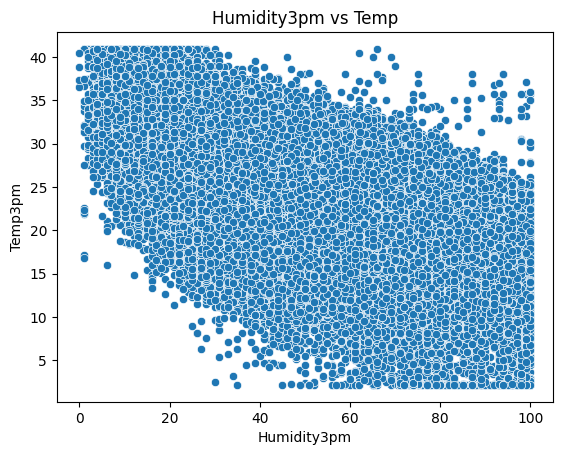

In [24]:
sns.scatterplot(x='Humidity3pm', y='Temp3pm', data=df)
plt.title("Humidity3pm vs Temp")

# Encoding #

In [25]:
cat_col = df.select_dtypes(include='object').columns
for col in cat_col:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    
df[cat_col] = df[cat_col].astype('int32')


## Models ##

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

In [ ]:
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

kf = KFold(n_splits=4, shuffle=True, random_state=42)
smote = SMOTE(random_state=42)


catboost = CatBoostClassifier(verbose=0, task_type="CPU")



### Train model ###

In [57]:

acc_scores, prec_scores, rec_scores, f1_scores = [], [], [], []

for train_index, test_index in kf.split(X):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_train, y_train = smote.fit_resample(X_train, y_train)
    # Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

  

    catboost.fit(X_train, y_train)


    preds = catboost.predict(X_test)

    acc_scores.append(accuracy_score(y_test, preds))
    prec_scores.append(precision_score(y_test, preds, zero_division=0))
    rec_scores.append(recall_score(y_test, preds, zero_division=0))
    f1_scores.append(f1_score(y_test, preds, zero_division=0))




### Model Evalution ##

In [58]:
acc_avg = np.mean(acc_scores)
prec_avg = np.mean(prec_scores)
rec_avg = np.mean(rec_scores)
f1_avg = np.mean(f1_scores)

print("Final Results with CatBoost + GridSearchCV + SMOTE + KFold")
print("="*50)
print(f"Accuracy : {acc_avg:.4f}")
print(f"Precision: {prec_avg:.4f}")
print(f"Recall   : {rec_avg:.4f}")
print(f"F1 Score : {f1_avg:.4f}")

Final Results with CatBoost + GridSearchCV + SMOTE + KFold
Accuracy : 0.8594
Precision: 0.7391
Recall   : 0.5761
F1 Score : 0.6475


Text(0.5, 1.0, 'Confusion Matrix')

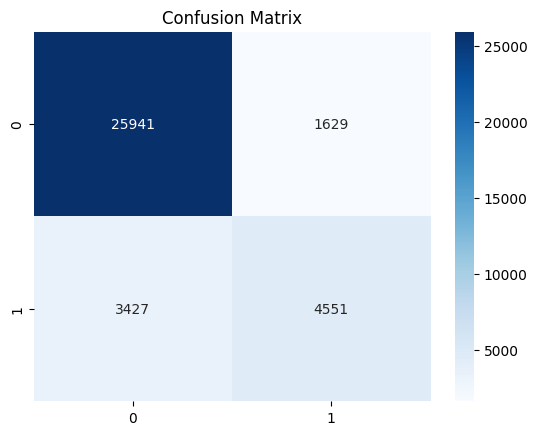

In [59]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, preds)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')

In [60]:
cr = classification_report(y_test, preds, zero_division=0)
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91     27570
           1       0.74      0.57      0.64      7978

    accuracy                           0.86     35548
   macro avg       0.81      0.76      0.78     35548
weighted avg       0.85      0.86      0.85     35548



In [64]:
import joblib

# حفظ
joblib.dump(catboost, "models\catboost_model.pkl")
joblib.dump(scaler, "models/scaler.pkl")
joblib.dump(le, "models/encoder.pkl")

['models/encoder.pkl']